# Method Definitions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context(font_scale= 4)
class Data:     
     
    '''
    Field-> data i.e The Data source
    
    Functions name:
    
    *     mimic_surge_error: Generating amount of water below the surge specify
    *     waterAmount_150_above: Water amount that is 150 and above
    *     waterAmount_150_less: water amount that is below 150
    *     waterAmount_0_values: Water amount of zero values
    *     fill_waterAmount_of_0_values: Filling the water amount of Zero values
    *     leaky_taps: Name of the leaky tap
    *     rename_tap: Renaming some incorrect Taps
    *     sort_filter_name: Sorting the Filter name orderly
    *     visualizing_amount_bar
    *     visualizing_amount_location
    
    '''
        
    def __init__(self, df):
        self.data= df
    
    def rename_column_name(self, names):
        self.data.columns= names
    
    def mimic_surge_error(self):
        surge = int(input("Specify surge value: "))
        return self.data[self.data['Amount_water'] <= surge] 
    
    def waterAmount_150_above(self):
        amount150=  self.data.loc[self.data["Amount_water"] >=150]
        amount500less = amount150[amount150["Amount_water"] < 500]
        return amount500less
    
    def waterAmount_150_less(self):
        amount150less= self.data[self.data["Amount_water"] < 150]
        return amount150less
    
    def waterAmount_0_values(self):
        zer= self.data['Amount_water']==0
        return self.data[zer]
    
    def fill_waterAmount_of_0_values(self):
        self.data['Amount_water']= self.data['Amount_water'].replace(0, self.data['Amount_water'].mean())
        return self.data
    
    def leaky_taps(self):
        leak= self.waterAmount_0_values()
        return leak.Filter_name
    
    def rename_tap(self, name):
        self.data["Filter_name"].replace(name, inplace= True)
        
    def sort_filter_name(self):
        self.data.sort_values(by= "Filter_name", axis = 0, inplace= True)
        
    def _annot(self, splot, decide= True):
        for p in splot.patches:
            if decide:
                rounder= '.1f'
            else:
                rounder= '1d'
            splot.annotate(format(p.get_height(), rounder),\
                   (p.get_x() + p.get_width() / 2., p.get_height()),\
                   ha = 'center', va = 'center',\
                   size=15,\
                   xytext = (0, -12),\
                   textcoords = 'offset points')

    def visualizing_amount_bar(self, df):
        splot= sns.barplot(data= df, x= 'Filter_name', y= 'Amount_water', errcolor= 'none', palette= 'coolwarm')
        self._annot(splot)
            
    def visualizing_amount_location(self, df):
        splot= sns.barplot(data= df, x= 'Filter_location', y= 'Amount_water', errcolor= 'none', palette= 'coolwarm')
        plt.xticks(rotation= 40)
        self._annot(splot)
        
    def visualizing_location_count(self, df):
        if(isinstance(df, pd.DataFrame)):
            splot= sns.countplot(data= df, x= 'Filter_name', palette= 'coolwarm')
            self._annot(splot, decide= False)
        elif(isinstance(df, pd.Series)):
            splot=  sns.countplot(x= df, palette= 'coolwarm')
            self._annot(splot, decide= False)

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the Dataset

In [2]:
# The dataframe
df= pd.read_csv("sqlDump.csv", header= 1, parse_dates= ['Tim'], index_col= "Tim")

In [3]:
data_class= Data(df)

In [4]:
data_class.data.head()

,Filter_Name,Filter_Location,Filter_Location.1,Filter_Location.2
Tim,,,,
2020-03-05 09:57:14,Tap 6,Faisal Town B Block,34.0,17
2020-03-05 09:57:13,Tap 6,Faisal Town B Block,66.0,33
2020-03-05 09:57:12,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:11,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:10,Tap 6,Faisal Town B Block,69.0,34


# Renaming the Column Header

In [5]:
data_class.rename_column_name(["Filter_name", 'Filter_location', "Amount_water", "Pulses"])

In [6]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-05 09:57:14,Tap 6,Faisal Town B Block,34.0,17
2020-03-05 09:57:13,Tap 6,Faisal Town B Block,66.0,33
2020-03-05 09:57:12,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:11,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:10,Tap 6,Faisal Town B Block,69.0,34


# Sorting the Filter name orderly

In [7]:
data_class.sort_filter_name()

In [8]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,ITU_Tap1,ITU Lahore,403.329987,201
2020-03-03 15:37:44,ITU_Tap1,ITU Lahore,403.329987,201
2020-03-03 10:17:21,ITU_Tap1,ITU Lahore,403.329987,201
2020-03-03 10:10:32,ITU_Tap1,ITU Lahore,503.559998,251
2020-03-03 13:47:07,ITU_Tap2,ITU Lahore,435.109985,217


# Renaming incorrect Filter name

In [9]:
data_class.rename_tap({
    'ITU_Tap2': 'Tap 2',
    'ITU_Tap1': "Tap 1",
    'ITU_Tap3': 'Tap 3'
})

In [10]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-03 15:37:44,Tap 1,ITU Lahore,403.329987,201
2020-03-03 10:17:21,Tap 1,ITU Lahore,403.329987,201
2020-03-03 10:10:32,Tap 1,ITU Lahore,503.559998,251
2020-03-03 13:47:07,Tap 2,ITU Lahore,435.109985,217


In [11]:
data_class.sort_filter_name()

In [12]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.000000,49


**Question 1.** ```Create functions that mimic the characterize errors - here, assuming I
want to check for surge error, I should be able to call this function
directly.```

In [13]:
specify_surge= data_class.mimic_surge_error()

Specify surge value: 150


In [14]:
specify_surge.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:42,Tap 1,Faisal Town B Block,98.0,49


In [15]:
specify_surge.tail()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 07:11:59,Tap 7,Faisal Town B Block,109.0,54
2020-03-04 12:09:43,Tap 7,Johar Town B1 Block,104.0,52
2020-03-03 08:29:25,Tap 7,Faisal Town B Block,0.0,0
2020-03-04 12:09:46,Tap 7,Johar Town B1 Block,106.0,53
2020-03-03 07:49:38,Tap 7,Faisal Town B Block,98.0,49


# Visualizing surge error

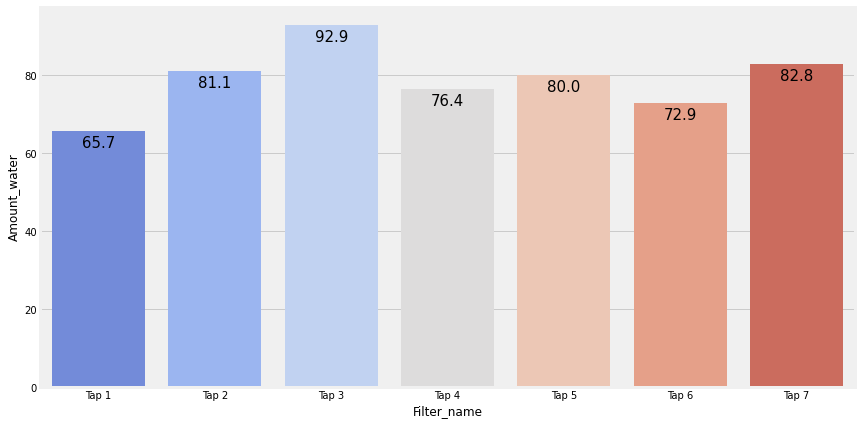

In [16]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_bar(specify_surge)

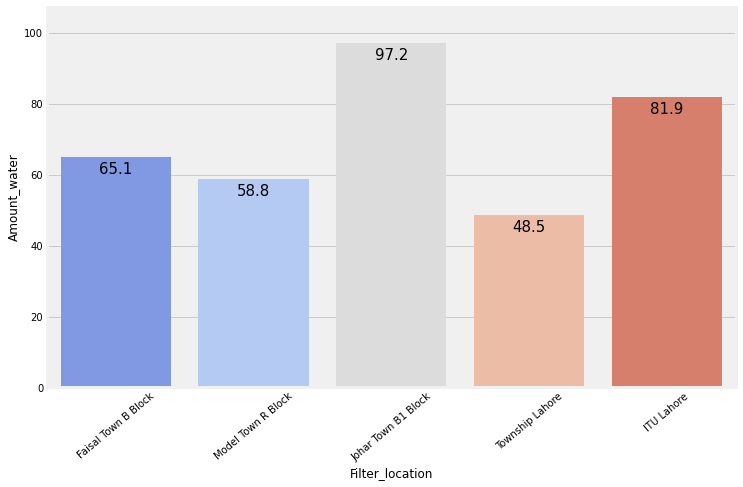

In [17]:
plt.figure(figsize= (11, 7))
data_class.visualizing_amount_location(specify_surge)


**Question 2.** ```Create a function that checks “Amount_Water” for data that is 150ml
and above but less than 500ml - the essence of this is that 150ml is the
standard amount of water per transaction. This would be a check for
successful transactions (meaning someone fetches the right amount of
water)```

In [18]:
# Water amount that is 150ml above but below 500ml
above150water= data_class.waterAmount_150_above()
above150water.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-02 20:06:49,Tap 1,Faisal Town B Block,229.000000,114
2020-03-02 20:04:49,Tap 1,Faisal Town B Block,242.000000,121
2020-03-02 20:05:49,Tap 1,Faisal Town B Block,234.000000,117
2020-03-03 18:53:14,Tap 1,Faisal Town B Block,224.000000,112


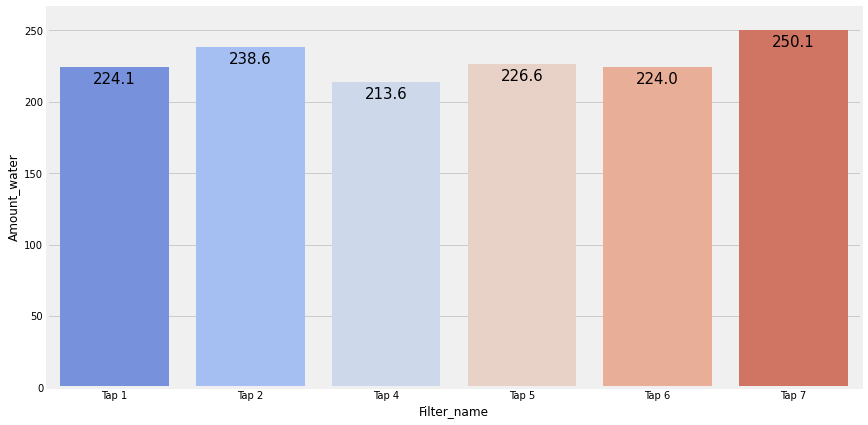

In [19]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_bar(above150water)

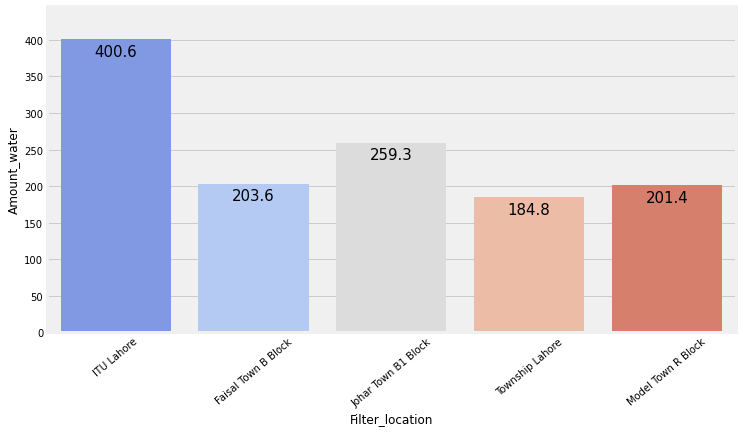

In [20]:
plt.figure(figsize= (11, 6))
data_class.visualizing_amount_location(above150water)

**Question 3.** ```Create a function that checks “Amount_Water” for data that is less
than 150ml.```

In [21]:
# Amount of water below 150ml
lesser_water= data_class.waterAmount_150_less()
lesser_water.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:42,Tap 1,Faisal Town B Block,98.0,49


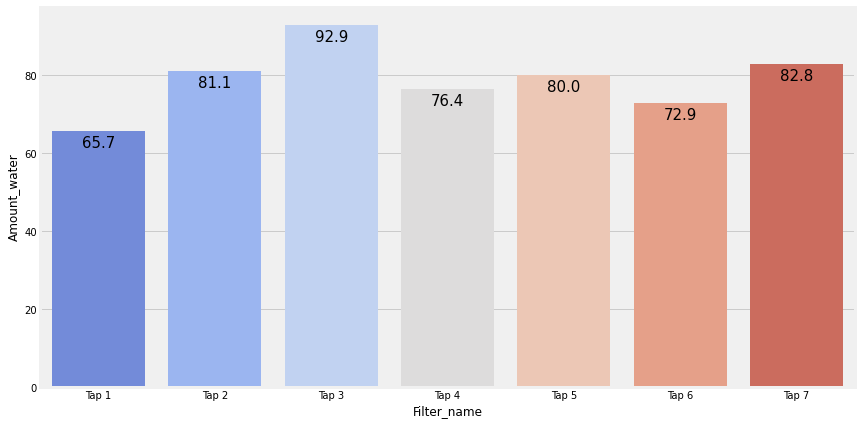

In [22]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_bar(lesser_water)

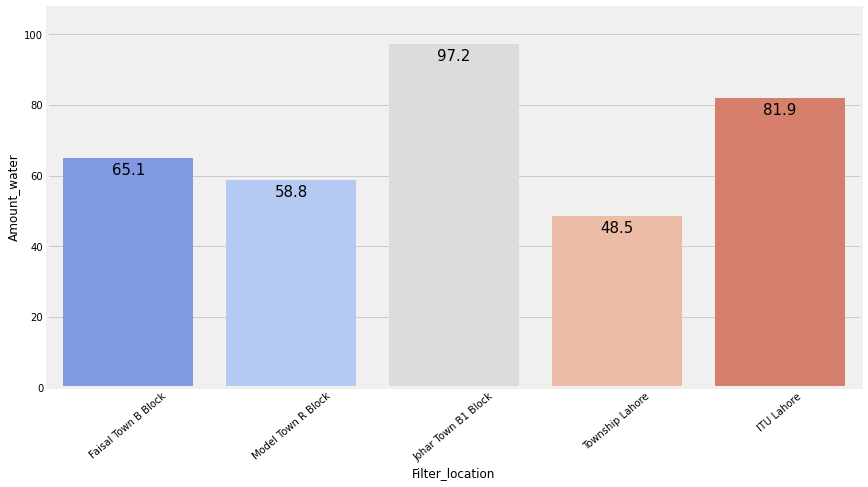

In [23]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_location(lesser_water)

**Question 5.** ```Create a function that checks “Amount_Water” for zeros, and do an
imputation to fill up the zeros```

In [24]:
#Function checking for zero water amount
check4zero= data_class.waterAmount_0_values()
check4zero.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-02 20:05:28,Tap 1,Model Town R Block,0.0,0
2020-03-02 20:05:27,Tap 1,Model Town R Block,0.0,0
2020-03-02 20:03:50,Tap 1,Faisal Town B Block,0.0,0
2020-03-05 07:05:31,Tap 1,Johar Town B1 Block,0.0,0
2020-03-02 20:05:29,Tap 1,Model Town R Block,0.0,0


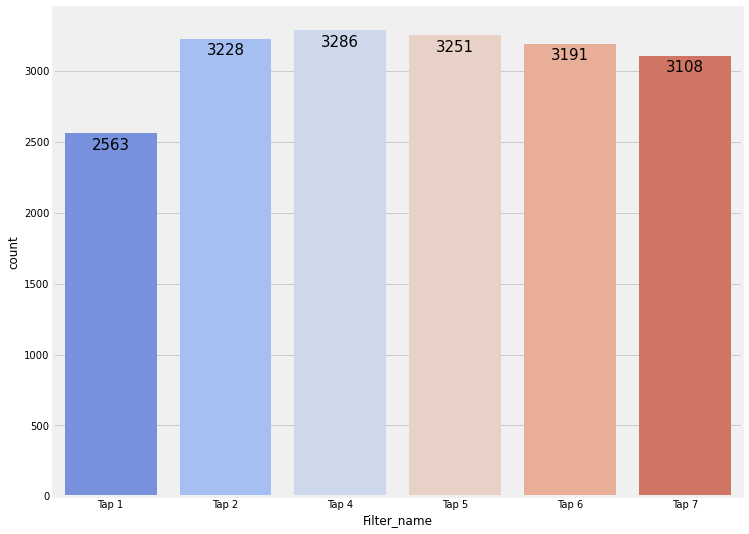

In [25]:
plt.figure(figsize= (11, 9))
data_class.visualizing_location_count(check4zero)

**Question 6.** ```Create a function with the title “leaky taps,” what this does is to
identify zero values in “Amount_Water” before imputation. The idea is
to map zero value to “Filter_Name”```

In [26]:
# Numbers of leaky tap
leaky= data_class.leaky_taps()
leaky.value_counts()

Tap 4    3286
Tap 5    3251
Tap 2    3228
Tap 6    3191
Tap 7    3108
Tap 1    2563
Name: Filter_name, dtype: int64

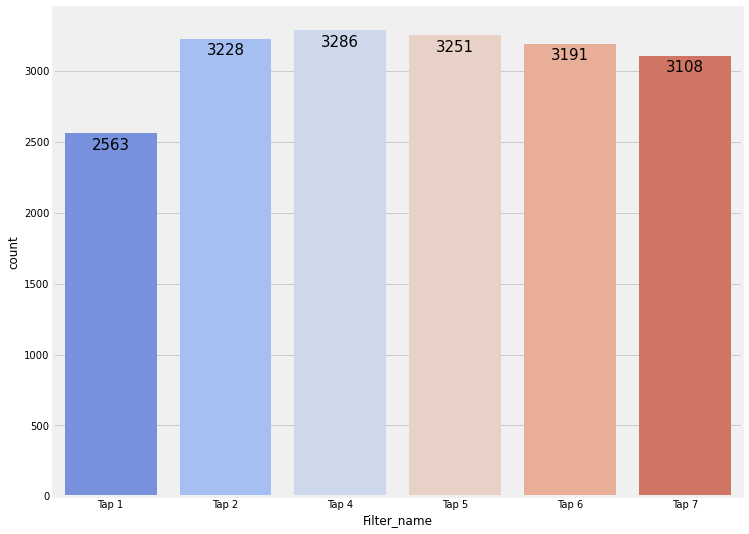

In [27]:
plt.figure(figsize= (11, 9))
data_class.visualizing_location_count(leaky)

# Imputation for values in the Data with the Mean of the column

In [28]:
#New data after filling the zero values with the mean
newdata= data_class.fill_waterAmount_of_0_values()
newdata.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.000000,49
